In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline 

In [71]:
df = pd.read_csv("/Users/jbp/Desktop/IRONHACK/SEMANA5/amz_uk_price_prediction_dataset.csv")

In [72]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
uid,2443651.0,1.370545e+06,816056.169852,1.0,658921.50,1349029.00,2060685.50,2828593.0
stars,2443651.0,2.152836e+00,2.194865,0.0,0.00,0.00,4.40,5.0
reviews,2443651.0,4.806278e+02,5944.124151,0.0,0.00,0.00,59.00,1356658.0
price,2443651.0,8.924381e+01,345.608862,0.0,9.99,19.09,45.99,100000.0
boughtInLastMonth,2443651.0,2.589699e+01,240.483727,0.0,0.00,0.00,0.00,50000.0


In [73]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


Parte 1:

In [74]:
freq_table_category = df["category"].value_counts()

freq_table_category

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

Sports & outdoors, Beauty, Handmade Clothing, Shoes & Accessories, Bath & Body and Birthday Gifts   are the top 5 more listed categories.

In [75]:
top5_category = freq_table_category.head(5)

In [76]:
top5_category

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

<Axes: ylabel='count'>

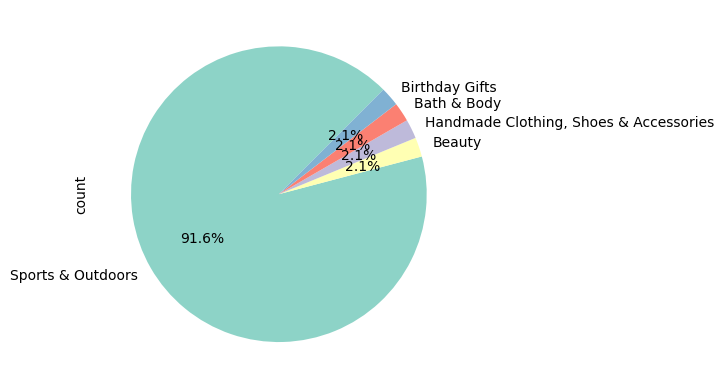

In [77]:
top5_category.plot.pie(autopct='%1.1f%%', startangle=45, colors=sns.color_palette("Set3"))

<Axes: xlabel='category'>

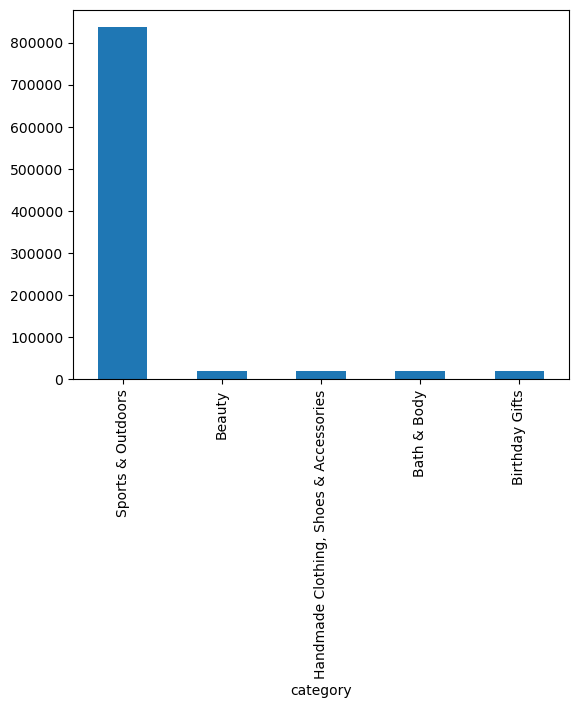

In [78]:
top5_category.plot(kind="bar")

Sports & outdoors dominates on the listed categories by far.

Parte 2:

In [79]:
mean_price = df["price"].mean()
median_price = df["price"].median()
mode_price = df["price"].mode()

In [80]:
print("The average price is", mean_price)
print("The median price is", median_price)
print("The most common price is", mode_price)

The average price is 89.24380943923661
The median price is 19.09
The most common price is 0    9.99
Name: price, dtype: float64


There is a lot of difference between the average price of all products listed and the mode.

In [81]:
var_price = df["price"].var()
std_price = df["price"].std()

In [82]:
print(var_price)
print(std_price)

119445.4853225653
345.6088617535223


In [83]:
df["price"].max()

100000.0

In [84]:
df["price"].min()

0.0

In [85]:
price_range = df["price"].max() - df["price"].min()
price_range

100000.0

In [86]:
Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)
iqr = Q3 - Q1
iqr

np.float64(36.0)

<Axes: xlabel='price', ylabel='Count'>

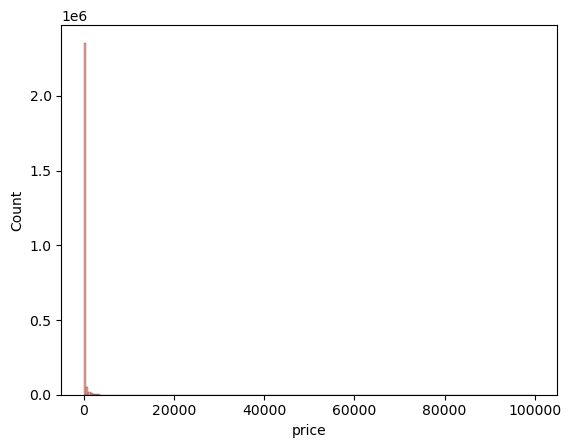

In [87]:
sns.histplot(df['price'], kde=False, bins=200, color="salmon")

<Axes: ylabel='price'>

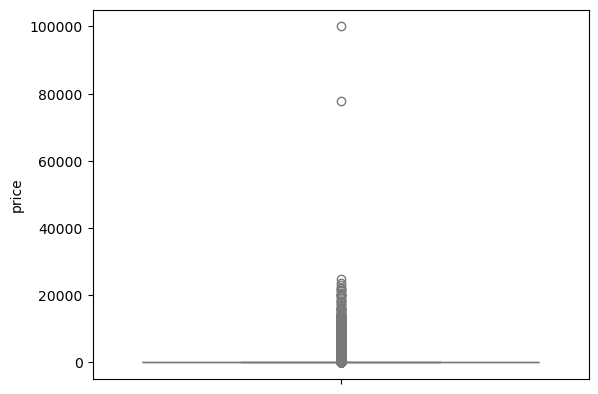

In [88]:
sns.boxplot(data = df["price"], color='lightblue')

The price range is very large because of the extreme values. This indicates a big outlier on the left, it is right skewed because of the small number of high priced products. The small IQR indicates most of the prices are in a lower range of price.

Parte 3:

In [89]:
df.columns

Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')

In [90]:
df["stars"]

0          4.7
1          4.7
2          4.7
3          4.7
4          4.6
          ... 
2443646    0.0
2443647    0.0
2443648    0.0
2443649    4.3
2443650    4.5
Name: stars, Length: 2443651, dtype: float64

In [91]:
df["stars"].value_counts()

stars
0.0    1225641
4.5     151577
4.6     136995
4.4     136165
5.0     128492
4.3     112564
4.7      94566
4.2      86871
4.0      66089
4.1      65115
4.8      41858
3.9      36555
3.8      27876
3.7      21137
3.6      16219
3.5      14673
3.0      12819
4.9      11081
3.4      10355
1.0       8484
3.3       8269
3.2       5771
3.1       4679
2.0       3901
2.9       3341
2.8       2306
2.7       2104
2.5       2103
2.6       1579
2.4       1060
2.3        734
2.2        602
2.1        540
1.5        404
1.9        300
1.8        249
1.7        177
1.4        149
1.6        147
1.3         78
1.2         23
1.1          3
Name: count, dtype: int64

We can see a lot of values on 0. Not rated.

In [92]:
mean_rating = df["stars"].mean()
median_rating = df["stars"].median()
mode_rating = df["stars"].mode()

In [93]:
print(mean_rating)
print(median_rating)
print(mode_rating)

2.152836472966066
0.0
0    0.0
Name: stars, dtype: float64


Ther's no actual common trend, cause most of the products were rated with 0 stars. But the average of ratings are a few above 2 stars

In [94]:
var_rating = df["stars"].var()
std_rating = df["stars"].std()

In [95]:
print(var_rating)
print(std_rating)

4.81743402976196
2.1948653785054697


In [96]:
Q1_r = df["stars"].quantile(0.25)
Q3_r = df["stars"].quantile(0.75)
iqr_r = Q3_r - Q1_r
iqr_r

np.float64(4.4)

There is a wide variation due to the 0 stars level of ratings.

<Axes: xlabel='stars', ylabel='Count'>

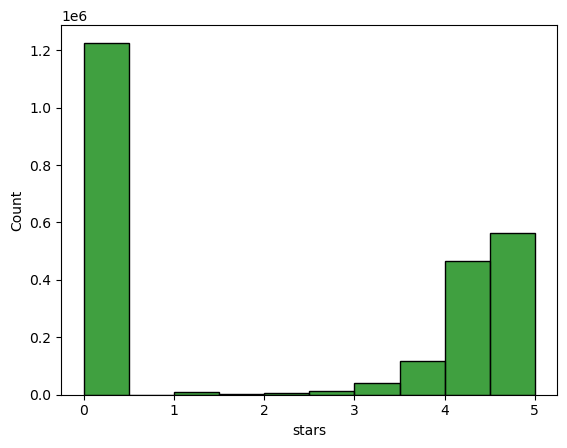

In [97]:
sns.histplot(df['stars'], kde=False, bins=10, color="green")

<Axes: ylabel='stars'>

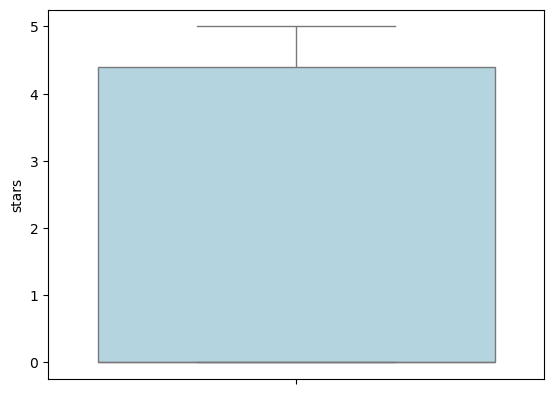

In [98]:
sns.boxplot(data = df["stars"], color='lightblue')

Ratings lean to lower values. Ratings have high variability with most of the products rated with 0 stars and the majority of rated products between 4 and 5 stars.